<a href="https://colab.research.google.com/github/Sanghita-C/Graph-Deep-Learning-on-Modulated-Signal-Classification/blob/main/QPSK_PAM__GCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ts2vg
!pip install StellarGraph

     |████████████████████████████████| 435 kB 4.3 MB/s 
     |████████████████████████████████| 462 kB 47.0 MB/s 


In [ ]:
import networkx as nx

### **ROUGH**

In [ ]:
'''#from ts2vg import NaturalVG
from visibility_graph import visibility_graph
ts = [1,0.5,0.3,0.2,1,0.5,0.3,0.8]

g = visibility_graph(ts)
#g.build(ts)
print(g.nodes())
print(type(g.nodes()))
print(g.edges())
print(type(g.edges()))


#edges = g.edges
#print(edges)
print(len(g.edges()))
#G1 = nx.MultiGraph()
#for pairs in edges:
 # G1.add_edge(ts[pairs[0]],ts[pairs[1]])
#print(G1.number_of_edges())
#print(G1.number_of_nodes())
#print(g.nodes)
#pos = nx.circular_layout(g, scale=2)
nx.draw(g)
#plt.show()'''

'#from ts2vg import NaturalVG\nfrom visibility_graph import visibility_graph\nts = [1,0.5,0.3,0.2,1,0.5,0.3,0.8]\n\ng = visibility_graph(ts)\n#g.build(ts)\nprint(g.nodes())\nprint(type(g.nodes()))\nprint(g.edges())\nprint(type(g.edges()))\n\n\n#edges = g.edges\n#print(edges)\nprint(len(g.edges()))\n#G1 = nx.MultiGraph()\n#for pairs in edges:\n # G1.add_edge(ts[pairs[0]],ts[pairs[1]])\n#print(G1.number_of_edges())\n#print(G1.number_of_nodes())\n#print(g.nodes)\n#pos = nx.circular_layout(g, scale=2)\nnx.draw(g) \n#plt.show()'

In [ ]:
'''from ts2vg import NaturalVG
#from visibility_graph import visibility_graph
ts = [1,0.5,0.3,0.2,1,0.5,0.3,0.8]
binned_ts = [1,2,2,2,1,2,2,1]
node_list = [1,2]


#g = visibility_graph(ts)
g=NaturalVG()
g.build(ts)
#print(type(g))
#print(g.nodes())
#print(type(g.nodes()))
edge_list = g.edges
G = nx.MultiGraph()
#print(g.edges)
#print(type(g.edges()))

#edges = g.edges
#print(edges)
#print(len(g.edges))
#G1 = nx.MultiGraph()
i=1
weighted_edges = []
for pairs in edge_list:
  print("actual node ",pairs[0]," ", pairs[1])
  n1 = binned_ts[pairs[0]]
  n2 = binned_ts[pairs[1]]
  print("binned_node ",n1," ",n2)
  weight = i
  i=i+1
  edge_tup = (n1,n2,weight)
  weighted_edges.append(edge_tup)
  G.add_edge(n1,n2,weight = weight)
 # G1.add_edge(ts[pairs[0]],ts[pairs[1]])

#G.add_nodes_from(node_list)
#G.add_edges_from(weighted_edges)
print(G.number_of_edges())
print(G.number_of_nodes())
#print(g.nodes)
#pos = nx.circular_layout(g, scale=2)
nx.draw(G,connectionstyle='arc3, rad = 0.1')
#plt.show()'''

'from ts2vg import NaturalVG\n#from visibility_graph import visibility_graph\nts = [1,0.5,0.3,0.2,1,0.5,0.3,0.8]\nbinned_ts = [1,2,2,2,1,2,2,1]\nnode_list = [1,2]\n\n\n#g = visibility_graph(ts)\ng=NaturalVG()\ng.build(ts)\n#print(type(g))\n#print(g.nodes())\n#print(type(g.nodes()))\nedge_list = g.edges\nG = nx.MultiGraph()\n#print(g.edges)\n#print(type(g.edges()))\n\n#edges = g.edges\n#print(edges)\n#print(len(g.edges))\n#G1 = nx.MultiGraph()\ni=1\nweighted_edges = []\nfor pairs in edge_list:\n  print("actual node ",pairs[0]," ", pairs[1])\n  n1 = binned_ts[pairs[0]]\n  n2 = binned_ts[pairs[1]]\n  print("binned_node ",n1," ",n2)\n  weight = i\n  i=i+1\n  edge_tup = (n1,n2,weight)\n  weighted_edges.append(edge_tup)\n  G.add_edge(n1,n2,weight = weight)\n # G1.add_edge(ts[pairs[0]],ts[pairs[1]])\n\n#G.add_nodes_from(node_list)\n#G.add_edges_from(weighted_edges)\nprint(G.number_of_edges())\nprint(G.number_of_nodes())\n#print(g.nodes)\n#pos = nx.circular_layout(g, scale=2)\nnx.draw(G,connec

### MAIN PART

In [ ]:
import numpy as np
from math import atan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn import preprocessing
#df = pd.read_excel('GFSKMagSignals.xlsx',header = None)
QPSK_path = '/content/drive/MyDrive/Data/QPSKMagSignals.xlsx'
PAM_path = '/content/drive/MyDrive/Data/PAM4MagSignals.xlsx'
df1 = pd.read_excel(PAM_path,header = None)
df2 = pd.read_excel(QPSK_path,header = None)
#df3 = pd.read_excel('GFSKMagSignals.xlsx',header = None)
df = pd.concat([df1,df2],axis=1)
print(df.head())
print(df.shape)

        0         1         2         3         4         5         6    \
0  1.949831  1.223147  1.360197  0.593595  0.613755  0.360141  0.922271   
1  0.798547  0.567851  1.711320  1.458790  0.565300  0.717364  1.391933   
2  0.653172  1.077200  1.375063  1.742913  1.243031  0.831867  1.095960   
3  1.245456  1.121993  1.230098  1.063606  1.185056  0.891300  1.137179   
4  1.039264  0.497130  0.650183  1.887460  1.617167  0.806883  1.238571   

        7         8         9    ...       989       990       991       992  \
0  0.805663  0.689300  1.417079  ...  0.677636  1.300217  0.141356  0.922821   
1  1.070061  0.369711  0.645414  ...  0.765123  0.249578  1.548519  0.824536   
2  1.092751  1.912131  1.030899  ...  0.853083  0.425829  1.555078  1.233390   
3  1.318698  0.961780  0.764023  ...  1.228016  1.542340  0.616841  1.568967   
4  1.146812  1.548623  0.216076  ...  1.154129  0.738952  0.402851  1.784499   

        993       994       995       996       997       998  
0  0

In [ ]:
print(df1)
print(df2)

           0         1         2         3         4         5         6    \
0     1.949831  1.223147  1.360197  0.593595  0.613755  0.360141  0.922271   
1     0.798547  0.567851  1.711320  1.458790  0.565300  0.717364  1.391933   
2     0.653172  1.077200  1.375063  1.742913  1.243031  0.831867  1.095960   
3     1.245456  1.121993  1.230098  1.063606  1.185056  0.891300  1.137179   
4     1.039264  0.497130  0.650183  1.887460  1.617167  0.806883  1.238571   
...        ...       ...       ...       ...       ...       ...       ...   
1019  1.329523  0.090564  0.613245  0.652404  0.578535  0.706474  0.209900   
1020  0.403713  0.170452  0.696089  1.235051  0.614361  1.040101  1.300357   
1021  0.392356  0.890536  1.270272  0.892856  0.349816  1.383616  0.762680   
1022  0.514939  1.222968  0.266540  0.675937  0.430952  0.437594  0.456063   
1023  1.325319  0.223751  1.488166  0.530929  0.543430  0.922976  0.241075   

           7         8         9    ...       989       990    

In [ ]:

df = df.to_numpy()
type(df)

numpy.ndarray

# rough

In [ ]:
'''for i in range(0,15):
  ts= df[:,i]
  print(ts)
  minv=ts[0]
  maxv = ts[0]
  for j in range(0,1024):
    if ts[j]>maxv:
      maxv = ts[j]
    if ts[j]<minv:
      minv = ts[j]
  print("min : ",minv)
  print("max : ",maxv)
  '''

[1.949831   0.79854747 0.65317217 ... 0.39235585 0.51493906 1.32531902]
min :  0.013367893812995774
max :  2.5614009071136117
[1.22314666 0.56785123 1.07720007 ... 0.89053562 1.2229676  0.22375134]
min :  0.03607609475124952
max :  2.576782837608856
[1.36019671 1.71131979 1.37506325 ... 1.27027176 0.26653969 1.48816628]
min :  0.022316260732515896
max :  2.5893469789986687
[0.59359497 1.45879033 1.74291293 ... 0.89285605 0.67593723 0.53092915]
min :  0.02290343988669808
max :  2.2921648693741217
[0.61375518 0.56529978 1.24303079 ... 0.34981644 0.43095196 0.54342975]
min :  0.03999118367286829
max :  2.575302548480712
[0.36014107 0.71736449 0.8318667  ... 1.38361555 0.43759414 0.92297593]
min :  0.0186191684465586
max :  2.583901946768286
[0.9222712  1.39193289 1.09596006 ... 0.76267995 0.45606256 0.24107518]
min :  0.028393614131373528
max :  2.4901651113210845
[0.80566337 1.07006058 1.09275088 ... 0.52295922 0.38653416 0.26783794]
min :  0.05687533786033689
max :  2.504825087203915
[0

In [ ]:
'''hist, bins = np.histogram(df,35)
print(hist)
print(bins)'''

In [ ]:

'''
binned_df = np.zeros((1024,1000))
for i in range(0,1000):
  for j in range(0,1000):
    binned = False
    for k in range(1,20):
      if df[i][j]<bins[k]:
        binned_df[i][j] = k
        binned = True
        break
    if binned == False:
      binned_df[i][j] = 20
print(binned_df[0][0])
print(binned_df.shape)
binned_df
'''

'\nbinned_df = np.zeros((1024,1000))\nfor i in range(0,1000):\n  for j in range(0,1000):\n    binned = False\n    for k in range(1,20):\n      if df[i][j]<bins[k]:\n        binned_df[i][j] = k\n        binned = True\n        break\n    if binned == False:\n      binned_df[i][j] = 20\nprint(binned_df[0][0])\nprint(binned_df.shape)\nbinned_df\n'

In [ ]:
'''binned_df1 = np.digitize(df,bins)
binned_df1'''

array([[ 2, 17,  6, ...,  9,  9, 26],
       [ 9, 19, 11, ...,  7, 10, 13],
       [12, 16,  5, ..., 15, 17,  8],
       ...,
       [15,  8,  9, ...,  6, 14,  7],
       [15,  6, 15, ..., 18,  4, 18],
       [ 9,  4, 10, ..., 14,  6,  6]])

In [ ]:
'''#from ts2vg import NaturalVG
from visibility_graph import visibility_graph
ts = binned_df1[:,0]

g = visibility_graph(ts)
#g.build(ts)
print(g.nodes())
print(type(g.nodes()))
print(g.edges())
print(type(g.edges()))


#edges = g.edges
#print(edges)
print(len(g.edges()))
#G1 = nx.MultiGraph()
#for pairs in edges:
 # G1.add_edge(ts[pairs[0]],ts[pairs[1]])
#print(G1.number_of_edges())
#print(G1.number_of_nodes())
#print(g.nodes)
#pos = nx.circular_layout(g, scale=2)
nx.draw(g)
plt.show()'''


'#from ts2vg import NaturalVG\nfrom visibility_graph import visibility_graph\nts = binned_df1[:,0]\n\ng = visibility_graph(ts)\n#g.build(ts)\nprint(g.nodes())\nprint(type(g.nodes()))\nprint(g.edges())\nprint(type(g.edges()))\n\n\n#edges = g.edges\n#print(edges)\nprint(len(g.edges()))\n#G1 = nx.MultiGraph()\n#for pairs in edges:\n # G1.add_edge(ts[pairs[0]],ts[pairs[1]])\n#print(G1.number_of_edges())\n#print(G1.number_of_nodes())\n#print(g.nodes)\n#pos = nx.circular_layout(g, scale=2)\nnx.draw(g) \nplt.show()'

# main code

In [ ]:
import networkx as nx
from ts2vg import NaturalVG
import matplotlib.pyplot as plt
from stellargraph import StellarGraph
#G.add_nodes_from(bins)

In [ ]:
sample_time = 200e3;

In [ ]:
graphSet = []
graphLabel = []
adj = []

In [ ]:
for i in range(0,1998):
  #print("new time series")
  ts= df[:,i]
  hist, bins = np.histogram(ts,20)
  binned_ts = np.digitize(ts,bins)
  #binned_ts=binned_df1[:,i]
  G = nx.DiGraph()
  g1 = NaturalVG()

  #print(binned_ts)
  g1.build(ts)
  edges = g1.edges # giving the node index pairs to represent the edges
  node_list = [];
  edge_list=[]
  #edges.sort()
  #print(edges)
  #print(type(edges))
  #print(type(edges[0]))
  #print("number of edges = ", len(edges))
  for pairs in edges:
    node_list.append(binned_ts[pairs[0]])
    node_list.append(binned_ts[pairs[1]])
    if pairs[0]<pairs[1]:
      weight = atan((ts[pairs[1]]-ts[pairs[0]])/((pairs[1]-pairs[0])))
      #print(weight)
      tupple = (pairs[0],pairs[1],weight)
      edge_list.append(tupple)
    #print(i)
    #print(pairs[0])
    #print(pairs[1])
    #print(df[pairs[1],i])
    #print(df[pairs[0],i])
  #if i<999:
     # weight_of_edge =1 #atan((binned_ts[pairs[0]]-binned_ts[pairs[1]])/((pairs[0]-pairs[1])*sample_time))  #pairs[0]>pairs[1]:
  #else:
      #weight_of_edge =2 #atan((binned_ts[pairs[1]]-binned_ts[pairs[0]])/((pairs[1]-pairs[0])*sample_time))
    #print(binned_df1[pairs[0],i])
    #print(binned_df1[pairs[1],i])
    #print(weight_of_edge)
  node_list = np.array(node_list)
  node_list = np.unique(node_list)
  node_list = node_list.tolist()
  G.add_nodes_from(node_list)
  G.add_weighted_edges_from(edge_list)
    #G.add_edge(binned_ts[pairs[0]],binned_ts[pairs[1]])
  '''
        The next part will take care of generating few features for each node and we will try to embedd these features to the nodes
        which will be used later while doing the CNN part.

        AS OF NOW THE FEATURES DON'T INCLUDE STANDARD DEVIATION OF EDGE WEIGHTS

  '''
  #node_id = list(G.nodes())
  #print(node_id)
  node_attr = {}
  for node in node_list:
    key = node
    degrees = G.degree(node)
    edgeMean = G.degree(node,weight="weight")
    edgeMean = edgeMean/degrees
    feature_set = {'Degrees': degrees,
                   'MeanWeight': edgeMean}
    node_attr[key] = feature_set


  feature_df = pd.DataFrame(node_attr)
  feature_df = feature_df.transpose()
  #print(feature_df)
  nx.set_node_attributes(G,node_attr)
  graph = StellarGraph.from_networkx(G,node_features = feature_df)
  #print(type(G))
  graphSet.append(graph)
  #matrix = nx.to_numpy_matrix(G)
  #adj.append(matrix)
  if i<999:
    graphLabel.append(1)
  else:
    graphLabel.append(2)
  '''else:
    graphLabel.append(3)'''


  #print(graph.info())

  #nx.draw( G )
  #plt.show()
  #print(G.number_of_nodes())
  #print(type(G.nodes()))
    #G.add_edge(pairs[0],pairs[1])

# feature extraction

In [ ]:
graphLabel = np.array(graphLabel)
print(graphLabel)
print(len(graphLabel))

[1 1 1 ... 2 2 2]
1998


In [ ]:
metrics = []
for adj in adj:
 G = nx.from_numpy_matrix(adj)
 # basic properties
 num_edges = G.number_of_edges()
 # clustering measures
 cc = nx.average_clustering(G)
 # measure of efficiency
 eff = nx.global_efficiency(G)
 #shortest_path = nx.average_shortest_path_length(G)
 metrics.append([num_edges,cc,eff])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(metrics, graphLabel, test_size=0.3, random_state=42)

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[113, 0.9545787545787547, 0.9714285714285714], [128, 0.9631410256410258, 0.9791666666666666], [124, 0.940247252747253, 0.9583333333333334], [126, 0.9430090742590743, 0.9666666666666667], [124, 0.9461309523809526, 0.9625], [125, 0.9463702963702965, 0.9666666666666667], [125, 0.9423201798201799, 0.9666666666666667], [127, 0.9539835164835166, 0.9708333333333333], [129, 0.9596153846153848, 0.975], [130, 0.9647435897435899, 0.9791666666666666], [123, 0.9296675546675549, 0.9541666666666667], [121, 0.9267357642357643, 0.95], [121, 0.9283216783216784, 0.9541666666666667], [129, 0.9585622710622712, 0.975], [128, 0.9558275058275059, 0.975], [130, 0.9631410256410258, 0.9791666666666666], [126, 0.9527243589743591, 0.9708333333333333], [109, 0.9291271691271692, 0.9571428571428572], [121, 0.9269813519813521, 0.95], [127, 0.9513965201465203, 0.9708333333333333], [123, 0.9285298035298036, 0.9541666666666667], [101, 0.9703629703629704, 0.9835164835164835], [111, 0.9391142191142191, 0.9666666666666667]

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy', accuracy_score(y_test,y_pred))
print('Precision', precision_score(y_test,y_pred))
print('Recall', recall_score(y_test,y_pred))
print('F1-score', f1_score(y_test,y_pred))

Accuracy 0.49166666666666664
Precision 0.0
Recall 0.0
F1-score 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# not a part of this code

In [ ]:
matrix = nx.to_numpy_matrix(graphSet[0])
print(len(matrix))
matrix

16


matrix([[-3.67254123e+00,  1.57038375e+00, -9.42128716e+00,
         -4.76378789e+00, -1.59565518e+00, -3.12680970e+00,
         -1.09977673e+01,  9.41878932e+00,  7.85131270e+00,
          1.09866465e+01,  3.13795588e+00, -6.28498595e+00,
          1.49046472e+00,  4.70766052e+00, -3.14012210e+00,
          1.25648150e+01],
        [ 1.57038375e+00,  0.00000000e+00,  1.57063863e+00,
          4.71076820e+00, -3.12881303e+00,  3.13402295e+00,
         -4.69939518e+00,  4.54447848e+00,  2.98202591e+00,
          4.37751533e+00,  1.23730454e+00, -1.57062963e+00,
         -1.57051884e+00, -1.48572243e+00,  0.00000000e+00,
          0.00000000e+00],
        [-9.42128716e+00,  1.57063863e+00,  1.59104554e+00,
          3.45486110e+01,  2.44142800e-04,  6.28038625e+00,
         -1.41317547e+01, -3.14114405e+00, -4.71191969e+00,
         -3.14090787e+00,  0.00000000e+00, -1.09654044e+01,
         -1.25584259e+01,  0.00000000e+00, -9.41301967e+00,
         -3.14069221e+00],
        [-4.7637878

In [ ]:
matrix1 = nx.to_numpy_matrix(graphSet[1])
#print(len(matrix))
matrix1

matrix([[ 1.57413455e+00,  1.57079308e+00, -6.28285691e+00,
         -1.41370844e+01,  1.25663324e+01,  4.08328681e+01,
         -1.41365312e+01,  3.29857315e+01,  1.57074101e+00,
         -1.41367217e+01, -1.57076827e+01,  7.85373618e+00,
          3.14125621e+00, -1.57074609e+00,  3.14156479e+00],
        [ 1.57079308e+00,  0.00000000e+00,  1.57079027e+00,
          3.14157051e+00, -7.95830221e-06, -1.57070525e+00,
          1.51569304e-04,  4.70957361e+00,  1.56796812e+00,
          4.70825590e+00, -2.06579031e-03,  1.46659287e+00,
         -6.28291527e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.28285691e+00,  1.57079027e+00, -3.14826043e+00,
          3.55295094e-04, -3.14140751e+00,  6.28309829e+00,
         -1.41368665e+01, -1.57072279e+00,  1.57075211e+00,
         -6.28320174e+00, -7.85376437e+00,  3.14157385e+00,
          1.88491266e+01, -1.57078213e+01,  3.14157036e+00],
        [-1.41370844e+01,  3.14157051e+00,  3.55295094e-04,
          9.42289145e+00, -1.41369075

<function matplotlib.pyplot.show>

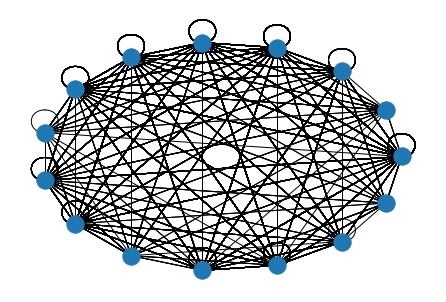

In [ ]:

my_pos = nx.circular_layout(graphSet[0])
nx.draw(graphSet[0],pos=my_pos)
plt.show

<function matplotlib.pyplot.show>

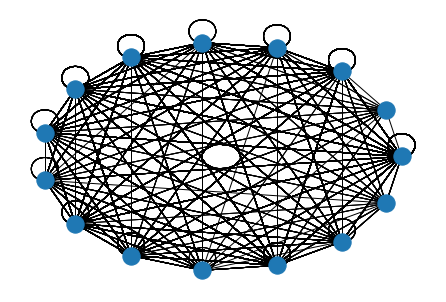

In [ ]:
my_pos = nx.circular_layout(graphSet[1])
nx.draw(graphSet[1],pos=my_pos)
plt.show

<function matplotlib.pyplot.show>

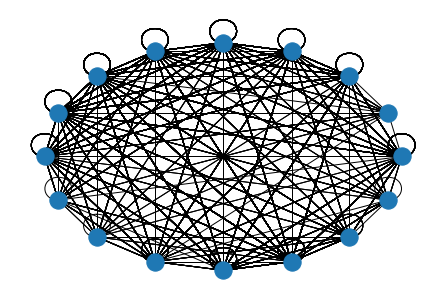

In [ ]:
my_pos = nx.circular_layout(graphSet[2])
nx.draw(graphSet[2],pos=my_pos)
plt.show

<function matplotlib.pyplot.show>

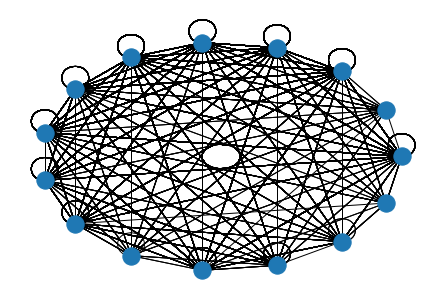

In [ ]:
my_pos = nx.circular_layout(graphSet[3])
nx.draw(graphSet[3],pos=my_pos)
plt.show

<function matplotlib.pyplot.show>

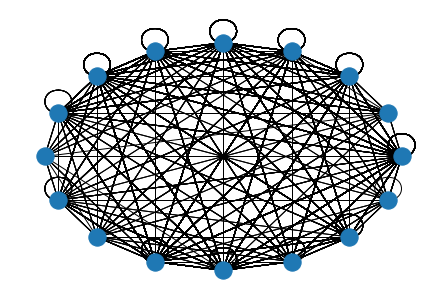

In [ ]:
my_pos = nx.circular_layout(graphSet[4])
nx.draw(graphSet[4],pos=my_pos)
plt.show

<function matplotlib.pyplot.show>

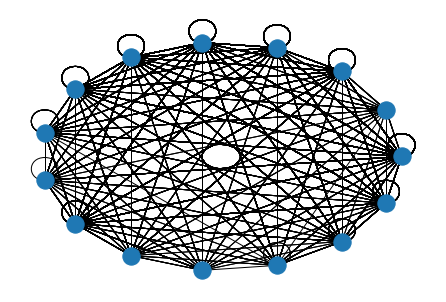

In [ ]:
my_pos = nx.circular_layout(graphSet[5])
nx.draw(graphSet[5],pos=my_pos)
plt.show

# Resume code

In [ ]:
print(len(graphLabel))
print(graphLabel)

1998
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
#graphLabel = graphLabel[800:2000]
#graphSet = graphSet[800:2000]

In [ ]:
'''merge_set = pd.DataFrame({'Graphs':graphSet,'modulation':graphLabel})
merge_set = merge_set.sample(frac=1)
print(merge_set)'''

                                                 Graphs  modulation
781   <stellargraph.core.graph.StellarGraph object a...           1
2885  <stellargraph.core.graph.StellarGraph object a...           3
2258  <stellargraph.core.graph.StellarGraph object a...           3
1075  <stellargraph.core.graph.StellarGraph object a...           2
2114  <stellargraph.core.graph.StellarGraph object a...           3
...                                                 ...         ...
2384  <stellargraph.core.graph.StellarGraph object a...           3
121   <stellargraph.core.graph.StellarGraph object a...           1
1764  <stellargraph.core.graph.StellarGraph object a...           2
1258  <stellargraph.core.graph.StellarGraph object a...           2
2139  <stellargraph.core.graph.StellarGraph object a...           3

[3001 rows x 2 columns]


In [ ]:
'''graphSet = list(merge_set['Graphs'])
graphLabel = list(merge_set['modulation'])'''

In [ ]:
graphLabel = pd.Series(graphLabel)

In [ ]:
graphLabel = pd.get_dummies(graphLabel, drop_first=True)
print(graphLabel)

      2
0     0
1     0
2     0
3     0
4     0
...  ..
1993  1
1994  1
1995  1
1996  1
1997  1

[1998 rows x 1 columns]


In [ ]:
print(len(graphSet))
print(graphSet[0].info())
print(graphSet[1993].info())

1998
StellarDiGraph: Directed multigraph
 Nodes: 1024, Edges: 3246

 Node types:
  default: [1024]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [3246]
        Weights: range=[-1.05389, 1.06876], mean=-0.00220789, std=0.295384
        Features: none
StellarDiGraph: Directed multigraph
 Nodes: 1024, Edges: 3115

 Node types:
  default: [1024]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [3115]
        Weights: range=[-1.04948, 1.1441], mean=-0.00218041, std=0.306867
        Features: none


In [ ]:
print(graphSet[3].info())
print(graphSet[1996].info())

StellarDiGraph: Directed multigraph
 Nodes: 1024, Edges: 3304

 Node types:
  default: [1024]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [3304]
        Weights: range=[-1.05408, 1.0642], mean=-0.000873618, std=0.287228
        Features: none
StellarDiGraph: Directed multigraph
 Nodes: 1024, Edges: 3051

 Node types:
  default: [1024]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [3051]
        Weights: range=[-1.07178, 1.037], mean=0.000173665, std=0.303297
        Features: none


In [ ]:
#graphSet = list(merge_set['Graphs'])
#graphLabel = list(merge_set['modulation'])
#graphLabel = pd.DataFrame(graphLabel,columns =['Labels'])
graphLabel.value_counts().to_frame()

,0
2,
0,999
1,999


In [ ]:

from stellargraph.mapper import PaddedGraphGenerator
generator = PaddedGraphGenerator(graphs=graphSet)
print(generator)

In [ ]:
!pip install tensorflow

In [ ]:
from stellargraph.layer import GCNSupervisedGraphClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn import model_selection

In [ ]:
def create_graph_classification_model(generator):
    gc_model = GCNSupervisedGraphClassification(
        layer_sizes=[64, 64],
        activations=["relu", "relu"],
        generator=generator,
        dropout=0.5,
    )
    x_inp, x_out = gc_model.in_out_tensors()
    predictions = Dense(units=32, activation="relu")(x_out)
    predictions = Dense(units=16, activation="relu")(predictions)
    predictions = Dense(units=1, activation="sigmoid")(predictions)
    #print(predictions)
    # Let's create the Keras model and prepare it for training
    model = Model(inputs=x_inp, outputs=predictions)
    model.compile(optimizer=Adam(0.005), loss=binary_crossentropy, metrics=["acc"])

    return model

In [ ]:
epochs = 10  # maximum number of training epochs
folds = 5  # the number of folds for k-fold cross validation
n_repeats = 2   # the number of repeats for repeated k-fold cross validation

In [ ]:
es = EarlyStopping(
    monitor="val_loss", min_delta=0, patience=25, restore_best_weights=True
)

In [ ]:
def train_fold(model, train_gen, test_gen, es, epochs):
    history = model.fit(
        train_gen, epochs=epochs, validation_data=test_gen, verbose=0, callbacks=[es],
    )
    # calculate performance on the test data and return along with history
    test_metrics = model.evaluate(test_gen, verbose=0)
    print(test_metrics)
    test_acc = test_metrics[model.metrics_names.index("acc")]

    return history, test_acc

In [ ]:
def get_generators(train_index, test_index, graph_labels, batch_size):
    train_gen = generator.flow(
        train_index, targets=graph_labels.iloc[train_index].values, batch_size=batch_size
    )
    test_gen = generator.flow(
        test_index, targets=graph_labels.iloc[test_index].values, batch_size=batch_size
    )
    #print(train_gen)
    #print(test_gen)
    return train_gen, test_gen

In [ ]:
test_accs = []

stratified_folds = model_selection.RepeatedStratifiedKFold(
    n_splits=folds, n_repeats=n_repeats
).split(graphSet, graphLabel)

for i, (train_index, test_index) in enumerate(stratified_folds):
    print(f"Training and evaluating on fold {i+1} out of {folds * n_repeats}...")
    train_gen, test_gen = get_generators(
        train_index, test_index, graphLabel, batch_size=64
    )

    model = create_graph_classification_model(generator)

    history, acc = train_fold(model, train_gen, test_gen, es, epochs)

    test_accs.append(acc)

Training and evaluating on fold 1 out of 10...
[0.692634105682373, 0.5]
Training and evaluating on fold 2 out of 10...
[0.6979804039001465, 0.5]
Training and evaluating on fold 3 out of 10...
[0.6929263472557068, 0.5]
Training and evaluating on fold 4 out of 10...
[0.6916426420211792, 0.5012531280517578]
Training and evaluating on fold 5 out of 10...
[0.6932160258293152, 0.5012531280517578]
Training and evaluating on fold 6 out of 10...
[0.6933711171150208, 0.5]
Training and evaluating on fold 7 out of 10...
[0.6927101612091064, 0.5]
Training and evaluating on fold 8 out of 10...
[0.6924139261245728, 0.5]
Training and evaluating on fold 9 out of 10...
[0.6919479966163635, 0.5012531280517578]
Training and evaluating on fold 10 out of 10...
[0.6927986741065979, 0.5012531280517578]


In [ ]:
print(test_accs)

[0.5, 0.5, 0.5, 0.5012531280517578, 0.5012531280517578, 0.5, 0.5, 0.5, 0.5012531280517578, 0.5012531280517578]


In [ ]:
print(
    f"Accuracy over all folds mean: {np.mean(test_accs)*100:.3}% and std: {np.std(test_accs)*100:.2}%"
)

Accuracy over all folds mean: 50.1% and std: 0.061%
